In [28]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Librerias de los modelos supervisados
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

## Modelación sin balanceo de datos

In [29]:
df = pd.read_csv("./dataset/predictive_transform_2.csv")
df

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20460,2020-04-13 23:30:00,31.0,1.0,28.0,100.0,0.0,0.0,0.0,246.4,244.7,244.3,79.0,45.4,86.6,426.0,422.3,426.1,38.0
20461,2020-04-13 23:45:00,31.0,1.0,28.0,100.0,0.0,0.0,0.0,246.8,245.1,244.8,77.0,42.0,84.2,426.8,423.1,427.1,39.1
20462,2020-04-14 00:00:00,31.0,1.0,28.0,100.0,0.0,0.0,0.0,247.8,246.0,246.0,77.4,37.1,75.4,428.5,425.0,428.7,38.8
20463,2020-04-14 00:15:00,30.0,1.0,28.0,100.0,0.0,0.0,0.0,247.7,245.9,245.5,70.1,36.7,88.1,428.2,424.3,428.4,45.2


## División del Dataset: train-test

In [30]:
X = df.drop(columns = ["DeviceTimeStamp", "MOG_A"] , axis=1)
y = df["MOG_A"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Normalización de los datos

In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos Supervisados, Clasificación binaria

## Modelo 1: Regresión Logística

In [32]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Evaluación

In [33]:
y_pred_lr = log_reg.predict(X_test)

In [34]:
lr_train = round(log_reg.score(X_train,y_train)*100, 2)
lr_accuracy = round(accuracy_score(y_test, y_pred_lr)*100, 2)

print("Accuracy del entrenamiento :",lr_train, "%")
print("Accuracy del modelo :",lr_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 94.26 %
Accuracy del modelo : 93.67 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      3655
         1.0       0.93      0.44      0.60       438

    accuracy                           0.94      4093
   macro avg       0.93      0.72      0.78      4093
weighted avg       0.94      0.94      0.93      4093

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


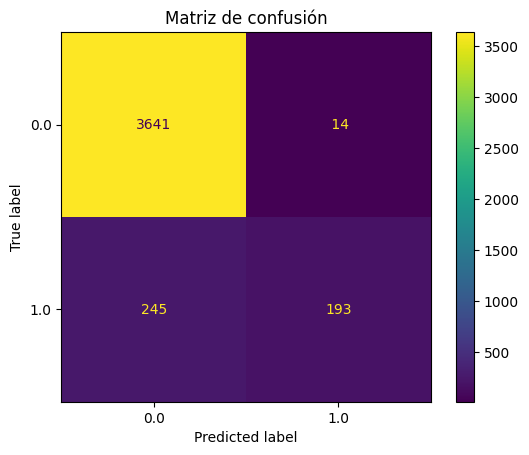

In [35]:
plot_confusion_matrix(log_reg, X_test, y_test, values_format='3g');
plt.title("Matriz de confusión")
plt.show()

## Modelo 2: Árbol de decision

In [36]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### evaluación

In [37]:
y_pred_dt = tree.predict(X_test)

In [38]:
dt_train = round(tree.score(X_train,y_train)*100, 2)
dt_accuracy = round(accuracy_score(y_test, y_pred_dt)*100, 2)

print("Accuracy del entrenamiento :",dt_train, "%")
print("Accuracy del modelo :",dt_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_dt))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 100.0 %
Accuracy del modelo : 98.22 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3655
         1.0       0.93      0.90      0.92       438

    accuracy                           0.98      4093
   macro avg       0.96      0.95      0.95      4093
weighted avg       0.98      0.98      0.98      4093

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


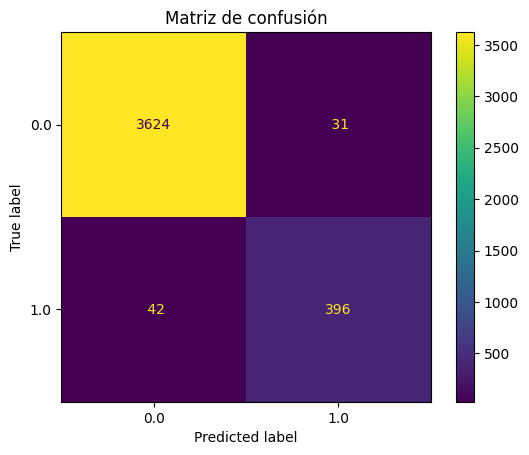

In [39]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(tree, X_test, y_test, values_format='3g');
plt.title("Matriz de confusión")
plt.show()

## Modelo 3: Bosques aleatorios

In [40]:
ran_for = RandomForestClassifier(n_estimators=100)
ran_for.fit(X_train, y_train)

RandomForestClassifier()

### Evaluación

In [41]:
y_pred_rf =ran_for.predict(X_test)

In [42]:
rf_train = round(ran_for.score(X_train,y_train)*100, 2)
rf_accuracy = round(accuracy_score(y_test, y_pred_rf)*100, 2)

print("Accuracy del entrenamiento :",rf_train, "%")
print("Accuracy del modelo :",rf_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 100.0 %
Accuracy del modelo : 98.8 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3655
         1.0       0.96      0.93      0.94       438

    accuracy                           0.99      4093
   macro avg       0.97      0.96      0.97      4093
weighted avg       0.99      0.99      0.99      4093

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


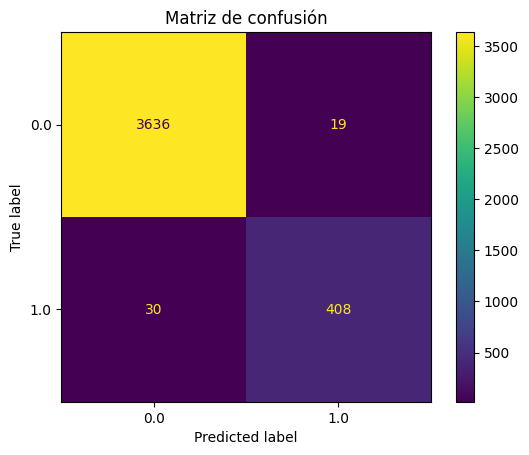

In [43]:
plot_confusion_matrix(ran_for, X_test, y_test);
plt.title("Matriz de confusión")
plt.show()

## Modelo 4: Máquina de Vectores de Soporte

In [44]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

### Evaluación

In [45]:
y_pred_svc = svc.predict(X_test)

In [46]:
svc_train = round(ran_for.score(X_train,y_train)*100, 2)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100, 2)

print("Accuracy del entrenamiento :",svc_train, "%")
print("Accuracy del modelo :",svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 100.0 %
Accuracy del modelo : 94.84 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      3655
         1.0       0.93      0.56      0.70       438

    accuracy                           0.95      4093
   macro avg       0.94      0.78      0.83      4093
weighted avg       0.95      0.95      0.94      4093

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


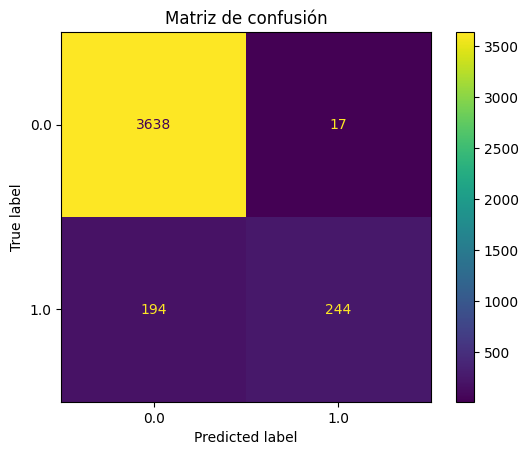

In [47]:
plot_confusion_matrix(svc, X_test, y_test);
plt.title("Matriz de confusión")
plt.show()

## Modelo 5: K-vecinos cercanos

In [48]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluación

In [49]:
y_pred_knn = knn.predict(X_test)

In [50]:
knn_train = round(knn.score(X_train,y_train)*100, 2)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn)*100, 2)

print("Accuracy del entrenamiento :",knn_train, "%")
print("Accuracy del modelo :",knn_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 97.98 %
Accuracy del modelo : 95.85 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3655
         1.0       0.81      0.79      0.80       438

    accuracy                           0.96      4093
   macro avg       0.89      0.89      0.89      4093
weighted avg       0.96      0.96      0.96      4093

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


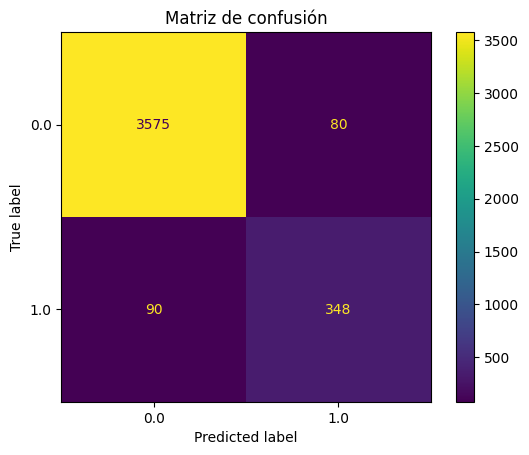

In [51]:
plot_confusion_matrix(knn, X_test, y_test);
plt.title("Matriz de confusión")
plt.show()

In [52]:
mod = pd.DataFrame({
    'Model': [
        'Regresión logística', 'Árboles de decisión', 'Bosques aleatorios', 'Máquinas de vectores de soporte', 'k vecinos cercanos'
    ],
    'Accuracy del entrenamiento': [
        lr_train, dt_train, rf_train, svc_train, knn_train
    ],
    'Accuracy de la evaluación': [
        lr_accuracy, dt_accuracy, rf_accuracy, svc_accuracy, knn_accuracy
    ]
})

In [53]:
mod

,Model,Accuracy del entrenamiento,Accuracy de la evaluación
0,Regresión logística,94.26,93.67
1,Árboles de decisión,100.00,98.22
2,Bosques aleatorios,100.00,98.80
3,Máquinas de vectores de soporte,100.00,94.84
4,k vecinos cercanos,97.98,95.85


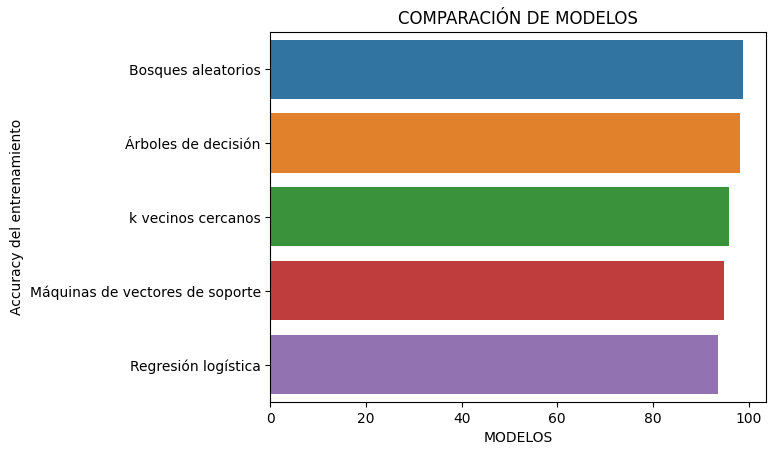

In [54]:
mod = mod.sort_values(by='Accuracy de la evaluación',ascending=False)[:8]

sns.barplot(y= 'Model', x= 'Accuracy de la evaluación', data= mod)
plt.title('COMPARACIÓN DE MODELOS')
plt.xlabel('MODELOS')
plt.ylabel('Accuracy del entrenamiento');